In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
data=pd.read_excel("/content/E-commerce.xlsx")

In [30]:
data

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,android,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,old,0,0
1,2018-10-18 14:27:00,android,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,latest,1,1
2,2018-10-18 14:43:00,android,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,intermediate,1,0
3,2018-10-18 14:46:00,android,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,latest,1,0
4,2018-10-18 14:46:00,android,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,latest,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,2018-11-03 12:39:00,android,8146.0,284263.0,5754.0,2125.0,13.0,1762.0,2018-11-15 09:46:00,207.0,latest,1,0
2021,2018-11-03 12:39:00,android,43622.0,284263.0,28621.0,2874.0,10.0,9375.0,2018-11-15 09:46:00,207.0,latest,1,0
2022,2018-11-03 12:41:00,android,12923.0,284263.0,28621.0,6105.0,17.0,2637.0,2018-11-15 09:46:00,3.0,latest,1,0
2023,2018-10-20 22:59:00,android,26523.0,418685.0,36253.0,3444.0,7.0,2037.0,2018-11-15 09:47:00,207.0,latest,0,0


In [32]:
data.columns

Index(['server_time', 'device_type', 'user_id', 'session_id', 'item_id',
       'item_price', 'category', 'product_type', 'impression_time', 'app_code',
       'os_version', 'is_4G', 'is_click'],
      dtype='object')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   server_time      2025 non-null   datetime64[ns]
 1   device_type      2025 non-null   object        
 2   user_id          2022 non-null   float64       
 3   session_id       2024 non-null   float64       
 4   item_id          2023 non-null   float64       
 5   item_price       2024 non-null   float64       
 6   category         2019 non-null   float64       
 7   product_type     2024 non-null   float64       
 8   impression_time  2025 non-null   datetime64[ns]
 9   app_code         2024 non-null   float64       
 10  os_version       2016 non-null   object        
 11  is_4G            2025 non-null   int64         
 12  is_click         2025 non-null   int64         
dtypes: datetime64[ns](2), float64(7), int64(2), object(2)
memory usage: 205.8+ KB


In [34]:
data.describe()

,user_id,session_id,item_id,item_price,category,product_type,app_code,is_4G,is_click
count,2022.000000,2.024000e+03,2023.000000,2024.000000,2019.000000,2024.000000,2024.000000,2025.000000,2025.000000
mean,46714.461919,5.473724e+05,63505.154721,6661.115119,10.290738,5359.607213,244.741107,0.342222,0.049877
std,26401.598808,3.108620e+05,36830.177344,17296.372880,4.961514,3076.114288,124.477650,0.474571,0.217744
min,10.000000,1.694000e+03,176.000000,16.000000,0.000000,6.000000,1.000000,0.000000,0.000000
25%,24853.000000,2.738070e+05,33845.500000,1465.000000,7.000000,2758.750000,190.000000,0.000000,0.000000
50%,46248.000000,5.440370e+05,62896.000000,2425.000000,11.000000,5355.500000,207.000000,0.000000,0.000000
75%,69375.500000,7.996875e+05,91322.000000,4793.000000,14.000000,8121.000000,371.000000,1.000000,0.000000
max,92508.000000,1.089219e+06,132865.000000,239360.000000,17.000000,10573.000000,508.000000,1.000000,1.000000


Filling null values

In [35]:
data.isna().sum()

server_time        0
device_type        0
user_id            3
session_id         1
item_id            2
item_price         1
category           6
product_type       1
impression_time    0
app_code           1
os_version         9
is_4G              0
is_click           0
dtype: int64

In [36]:
data["user_id"].fillna(method='ffill', inplace= True)
data["session_id"].fillna(method='ffill', inplace= True)
data["item_id"].fillna(method='ffill', inplace= True)
data["app_code"].fillna(method='ffill', inplace= True)
data["os_version"].fillna(method='ffill', inplace= True)
data["product_type"].fillna(method='ffill', inplace= True)

for i  in ["item_price", "category"]:
    data[i]= data[i].fillna(data[i].mode()[0])


In [37]:
data.isna().sum()

server_time        0
device_type        0
user_id            0
session_id         0
item_id            0
item_price         0
category           0
product_type       0
impression_time    0
app_code           0
os_version         0
is_4G              0
is_click           0
dtype: int64

Ouliers

In [38]:
num_clms = ['item_price', 'category', 'product_type']

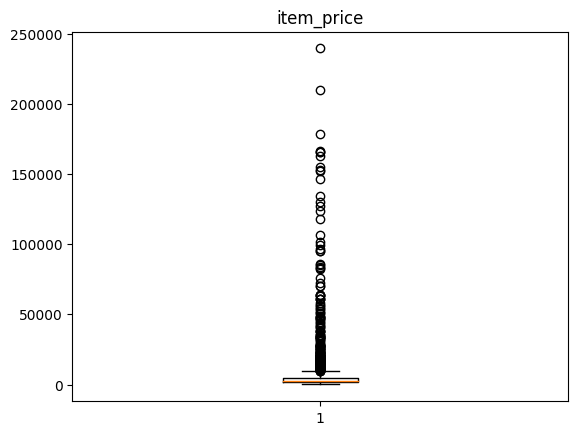

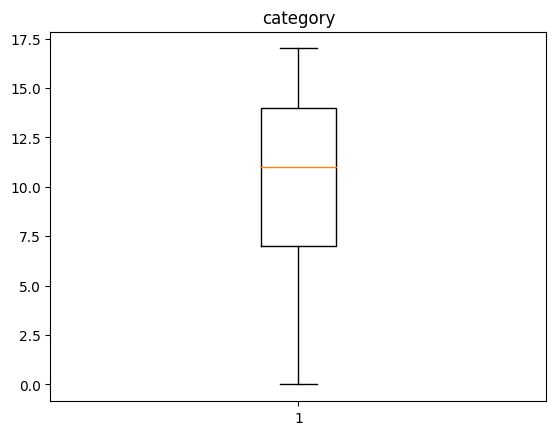

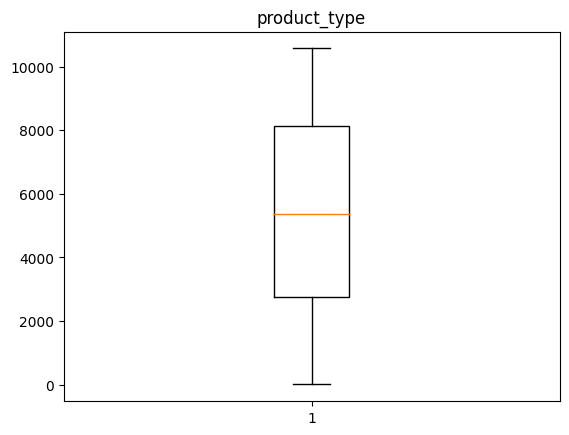

In [39]:
for i in num_clms:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)


In [40]:
Q1 = np.percentile(data["item_price"],25,method="midpoint")
Q2 = np.percentile(data["item_price"],50,method="midpoint")
Q3 = np.percentile(data["item_price"],75,method="midpoint")

In [41]:
print("Q1 is",Q1)
print("Q2 is",Q2)
print("Q3 is",Q3)

Q1 is 1465.0
Q2 is 2425.0
Q3 is 4793.0


In [42]:
IQR = Q3 -Q1


low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print("Min is", low_lim)
print("Max is", up_lim)


Min is -3527.0
Max is 9785.0


In [45]:
outlier = []
for x in data['item_price']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
outlier

[18118.0,
 17856.0,
 17222.0,
 11462.0,
 10246.0,
 23040.0,
 10822.0,
 10816.0,
 11712.0,
 12221.0,
 46656.0,
 20492.0,
 85760.0,
 9990.0,
 54336.0,
 15296.0,
 13984.0,
 33984.0,
 13420.0,
 19526.0,
 51136.0,
 9959.0,
 10758.0,
 10886.0,
 25472.0,
 35136.0,
 11404.0,
 11456.0,
 99507.0,
 12280.0,
 53625.0,
 18668.0,
 22208.0,
 21409.0,
 83776.0,
 14906.0,
 18557.0,
 130154.0,
 20416.0,
 14080.0,
 117849.0,
 17222.0,
 178099.0,
 165665.0,
 11369.0,
 32576.0,
 10240.0,
 14016.0,
 41369.0,
 16416.0,
 63936.0,
 10087.0,
 10310.0,
 12096.0,
 10298.0,
 21120.0,
 26956.0,
 13000.0,
 16960.0,
 152652.0,
 16128.0,
 47936.0,
 10039.0,
 19008.0,
 9792.0,
 27545.0,
 20160.0,
 10310.0,
 18278.0,
 165665.0,
 96768.0,
 10816.0,
 14656.0,
 64000.0,
 37916.0,
 70336.0,
 27400.0,
 24969.0,
 15808.0,
 15296.0,
 40256.0,
 12672.0,
 49016.0,
 61056.0,
 15968.0,
 22348.0,
 17665.0,
 22912.0,
 16265.0,
 47360.0,
 20428.0,
 12736.0,
 21248.0,
 11392.0,
 32808.0,
 27443.0,
 10771.0,
 10944.0,
 11008.0,
 17664.

In [46]:
ind1 = data["item_price"]>up_lim
data.loc[ind1].index


Int64Index([   6,    7,   31,   34,   49,   51,   63,   68,   74,   86,
            ...
            1933, 1937, 1948, 1953, 1961, 1978, 1981, 1983, 1998, 2012],
           dtype='int64', length=245)

In [47]:
data.drop(data.loc[ind1].index,inplace = True)
data.head(10)


,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,android,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,old,0,0
1,2018-10-18 14:27:00,android,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,latest,1,1
2,2018-10-18 14:43:00,android,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,intermediate,1,0
3,2018-10-18 14:46:00,android,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,latest,1,0
4,2018-10-18 14:46:00,android,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,latest,0,0
5,2018-10-18 14:47:00,android,67352.0,268465.0,44459.0,953.0,9.0,703.0,2018-11-15 00:03:00,409.0,latest,1,0
8,2018-10-26 09:08:00,android,83318.0,675965.0,129641.0,2868.0,7.0,842.0,2018-11-15 00:05:00,386.0,old,0,0
9,2018-11-04 09:14:00,android,70206.0,63432.0,64835.0,4032.0,17.0,623.0,2018-11-15 00:05:00,190.0,latest,0,0
10,2018-11-05 08:06:00,android,74339.0,116569.0,27574.0,2183.0,13.0,3248.0,2018-11-15 00:06:00,481.0,old,0,1
11,2018-10-16 10:40:00,android,62357.0,451378.0,127236.0,8552.0,7.0,6864.0,2018-11-15 00:06:00,385.0,latest,0,0


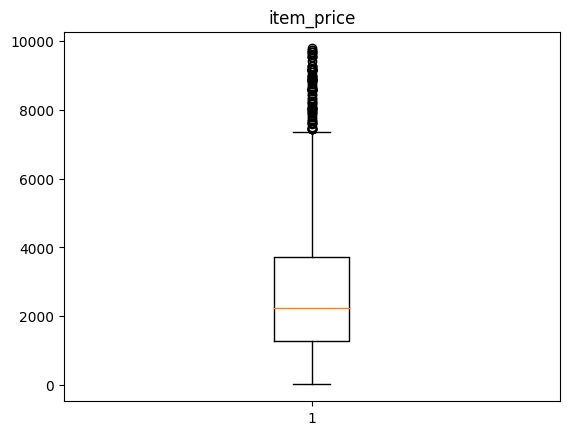

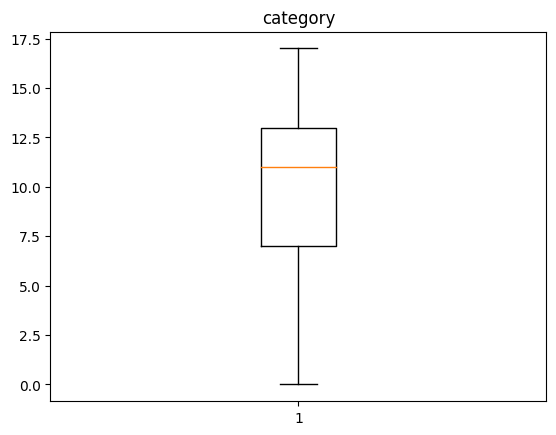

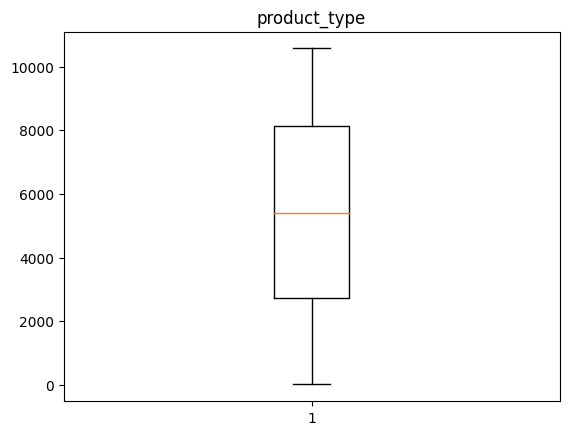

In [50]:
for i in num_clms:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)


Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
le=le= LabelEncoder()
data["device_type"].unique()


array(['android'], dtype=object)

In [10]:
data = pd.get_dummies(data)
data.head(10)


,server_time,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,is_4G,is_click,device_type_android,os_version_intermediate,os_version_latest,os_version_old
0,2018-10-18 14:27:00,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,0,0,1,0,0,1
1,2018-10-18 14:27:00,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,1,1,1,0,1,0
2,2018-10-18 14:43:00,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,1,0,1,1,0,0
3,2018-10-18 14:46:00,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,1,0,1,0,1,0
4,2018-10-18 14:46:00,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,0,0,1,0,1,0
5,2018-10-18 14:47:00,67352.0,268465.0,44459.0,953.0,9.0,703.0,2018-11-15 00:03:00,409.0,1,0,1,0,1,0
6,2018-10-22 09:48:00,64356.0,295495.0,40228.0,18118.0,16.0,2537.0,2018-11-15 00:03:00,190.0,0,0,1,1,0,0
7,2018-10-26 09:07:00,27329.0,675965.0,58320.0,17856.0,16.0,9641.0,2018-11-15 00:04:00,481.0,0,0,1,0,0,0
8,2018-10-26 09:08:00,83318.0,675965.0,129641.0,2868.0,7.0,842.0,2018-11-15 00:05:00,386.0,0,0,1,0,0,1
9,2018-11-04 09:14:00,70206.0,63432.0,64835.0,4032.0,17.0,623.0,2018-11-15 00:05:00,190.0,0,0,1,0,1,0


In [12]:
data.columns

Index(['server_time', 'user_id', 'session_id', 'item_id', 'item_price',
       'category', 'product_type', 'impression_time', 'app_code', 'is_4G',
       'is_click', 'device_type_android', 'os_version_intermediate',
       'os_version_latest', 'os_version_old'],
      dtype='object')

In [13]:
data.shape

(2025, 15)

correlation

In [19]:


x= data[['item_price', 'category', 'product_type']]


In [20]:
x.corr()

,item_price,category,product_type
item_price,1.000000,0.050378,-0.022924
category,0.050378,1.000000,-0.014132
product_type,-0.022924,-0.014132,1.000000


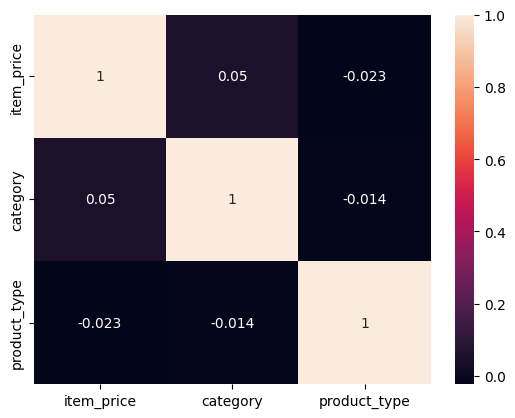

In [21]:
sns.heatmap(x.corr(),annot = True)
plt.show()
